#Real Estate Valuation Prediction of New Taipei City.

#Problem Statement:
The market historical data set of real estate valuation are collected from Xindian Dist., New Taipei City, Taiwan. The real estate valuation is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

Examining real estate valuation is essential for understanding residential preferences within a city. Higher property prices often indicate increased demand for certain locations, providing insights valuable for urban design and policies. Predictive modeling of real estate values can identify key factors influencing prices, aiding in informed decision-making for urban planning and policy implementation. The goal is to accurately predict property values based on various features, facilitating a deeper understanding of the dynamics shaping the real estate market.

#Data Description:
Dataset contains historical data from real estate market across 2012 to 2013, Sindian District, New Taipei City. Within the dataset, each row represents a transaction record of an real estate property, whereas each column corresponds to a feature describing that record. The dataset contains 414 records of property sales (414 rows).

#Attributes
1. the transaction date (for example, 2013.250-2013 March, 2013.500-2013 June, etc.

2. the house age (unit: year)

3. the distance to the nearest MRT station (unit: meter)

4. the number of convenience stores in the living circle on foot (integer)

5. the geographic coordinate, latitude. (unit: degree)

6. the geographic coordinate, longitude. (unit: degree))

#The output is as follows:

Target variable -- house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping-3.3 meter squared)

#libraries

In [87]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid",{'grid.linestyle': '--'})

import warnings
warnings.filterwarnings("ignore")

In [88]:
#import dataset
df=pd.read_csv('/content/Real_Estate_Valuation.csv')

In [89]:
#check few rows
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

### Data Exploration and Cleaning

In [90]:
df.columns  # This will display the column names


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [91]:
# Rename the columns names
df = df.rename(columns = {'X1 transaction date':'Date','X2 house age':'house_age','X3 distance to the nearest MRT station':'distance_to_nearest_mrt_station',
                          'X4 number of convenience stores':'number_of_convenience_stores',
                          'X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'house_price'})

In [92]:
df.head()

No      Date  house_age  distance_to_nearest_mrt_station  \
0   1  2012.917       32.0                         84.87882   
1   2  2012.917       19.5                        306.59470   
2   3  2013.583       13.3                        561.98450   
3   4  2013.500       13.3                        561.98450   
4   5  2012.833        5.0                        390.56840   

   number_of_convenience_stores  latitude  longitude  house_price  
0                            10  24.98298  121.54024         37.9  
1                             9  24.98034  121.53951         42.2  
2                             5  24.98746  121.54391         47.3  
3                             5  24.98746  121.54391         54.8  
4                             5  24.97937  121.54245         43.1

In [93]:
# checking structure of data
df.shape

(414, 8)

In [94]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               414 non-null    int64  
 1   Date                             414 non-null    float64
 2   house_age                        414 non-null    float64
 3   distance_to_nearest_mrt_station  414 non-null    float64
 4   number_of_convenience_stores     414 non-null    int64  
 5   latitude                         414 non-null    float64
 6   longitude                        414 non-null    float64
 7   house_price                      414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [95]:
#checking null or missing values
df.isnull().sum()

No                                 0
Date                               0
house_age                          0
distance_to_nearest_mrt_station    0
number_of_convenience_stores       0
latitude                           0
longitude                          0
house_price                        0
dtype: int64

In [96]:
#Descriptive Statistics
df.describe()

No         Date   house_age  distance_to_nearest_mrt_station  \
count  414.000000   414.000000  414.000000                       414.000000   
mean   207.500000  2013.148971   17.712560                      1083.885689   
std    119.655756     0.281967   11.392485                      1262.109595   
min      1.000000  2012.667000    0.000000                        23.382840   
25%    104.250000  2012.917000    9.025000                       289.324800   
50%    207.500000  2013.167000   16.100000                       492.231300   
75%    310.750000  2013.417000   28.150000                      1454.279000   
max    414.000000  2013.583000   43.800000                      6488.021000   

       number_of_convenience_stores    latitude   longitude  house_price  
count                    414.000000  414.000000  414.000000   414.000000  
mean                       4.094203   24.969030  121.533361    37.980193  
std                        2.945562    0.012410    0.015347    13.606488  
min                        0.000000   24.932070  121.473530     7.600000  
25%                        1.000000   24.963000  121.528085    27.700000  
50%                        4.000000   24.971100  121.538630    38.450000  
75%                        6.000000   24.977455  121.543305    46.600000  
max                       10.000000   25.014590  121.566270   117.500000

In [97]:
#Drop 'No' columns, it is not useful for further analysis
df = df.drop(columns = ['No'], axis = 1)

In [98]:
df.head()

Date  house_age  distance_to_nearest_mrt_station  \
0  2012.917       32.0                         84.87882   
1  2012.917       19.5                        306.59470   
2  2013.583       13.3                        561.98450   
3  2013.500       13.3                        561.98450   
4  2012.833        5.0                        390.56840   

   number_of_convenience_stores  latitude  longitude  house_price  
0                            10  24.98298  121.54024         37.9  
1                             9  24.98034  121.53951         42.2  
2                             5  24.98746  121.54391         47.3  
3                             5  24.98746  121.54391         54.8  
4                             5  24.97937  121.54245         43.1

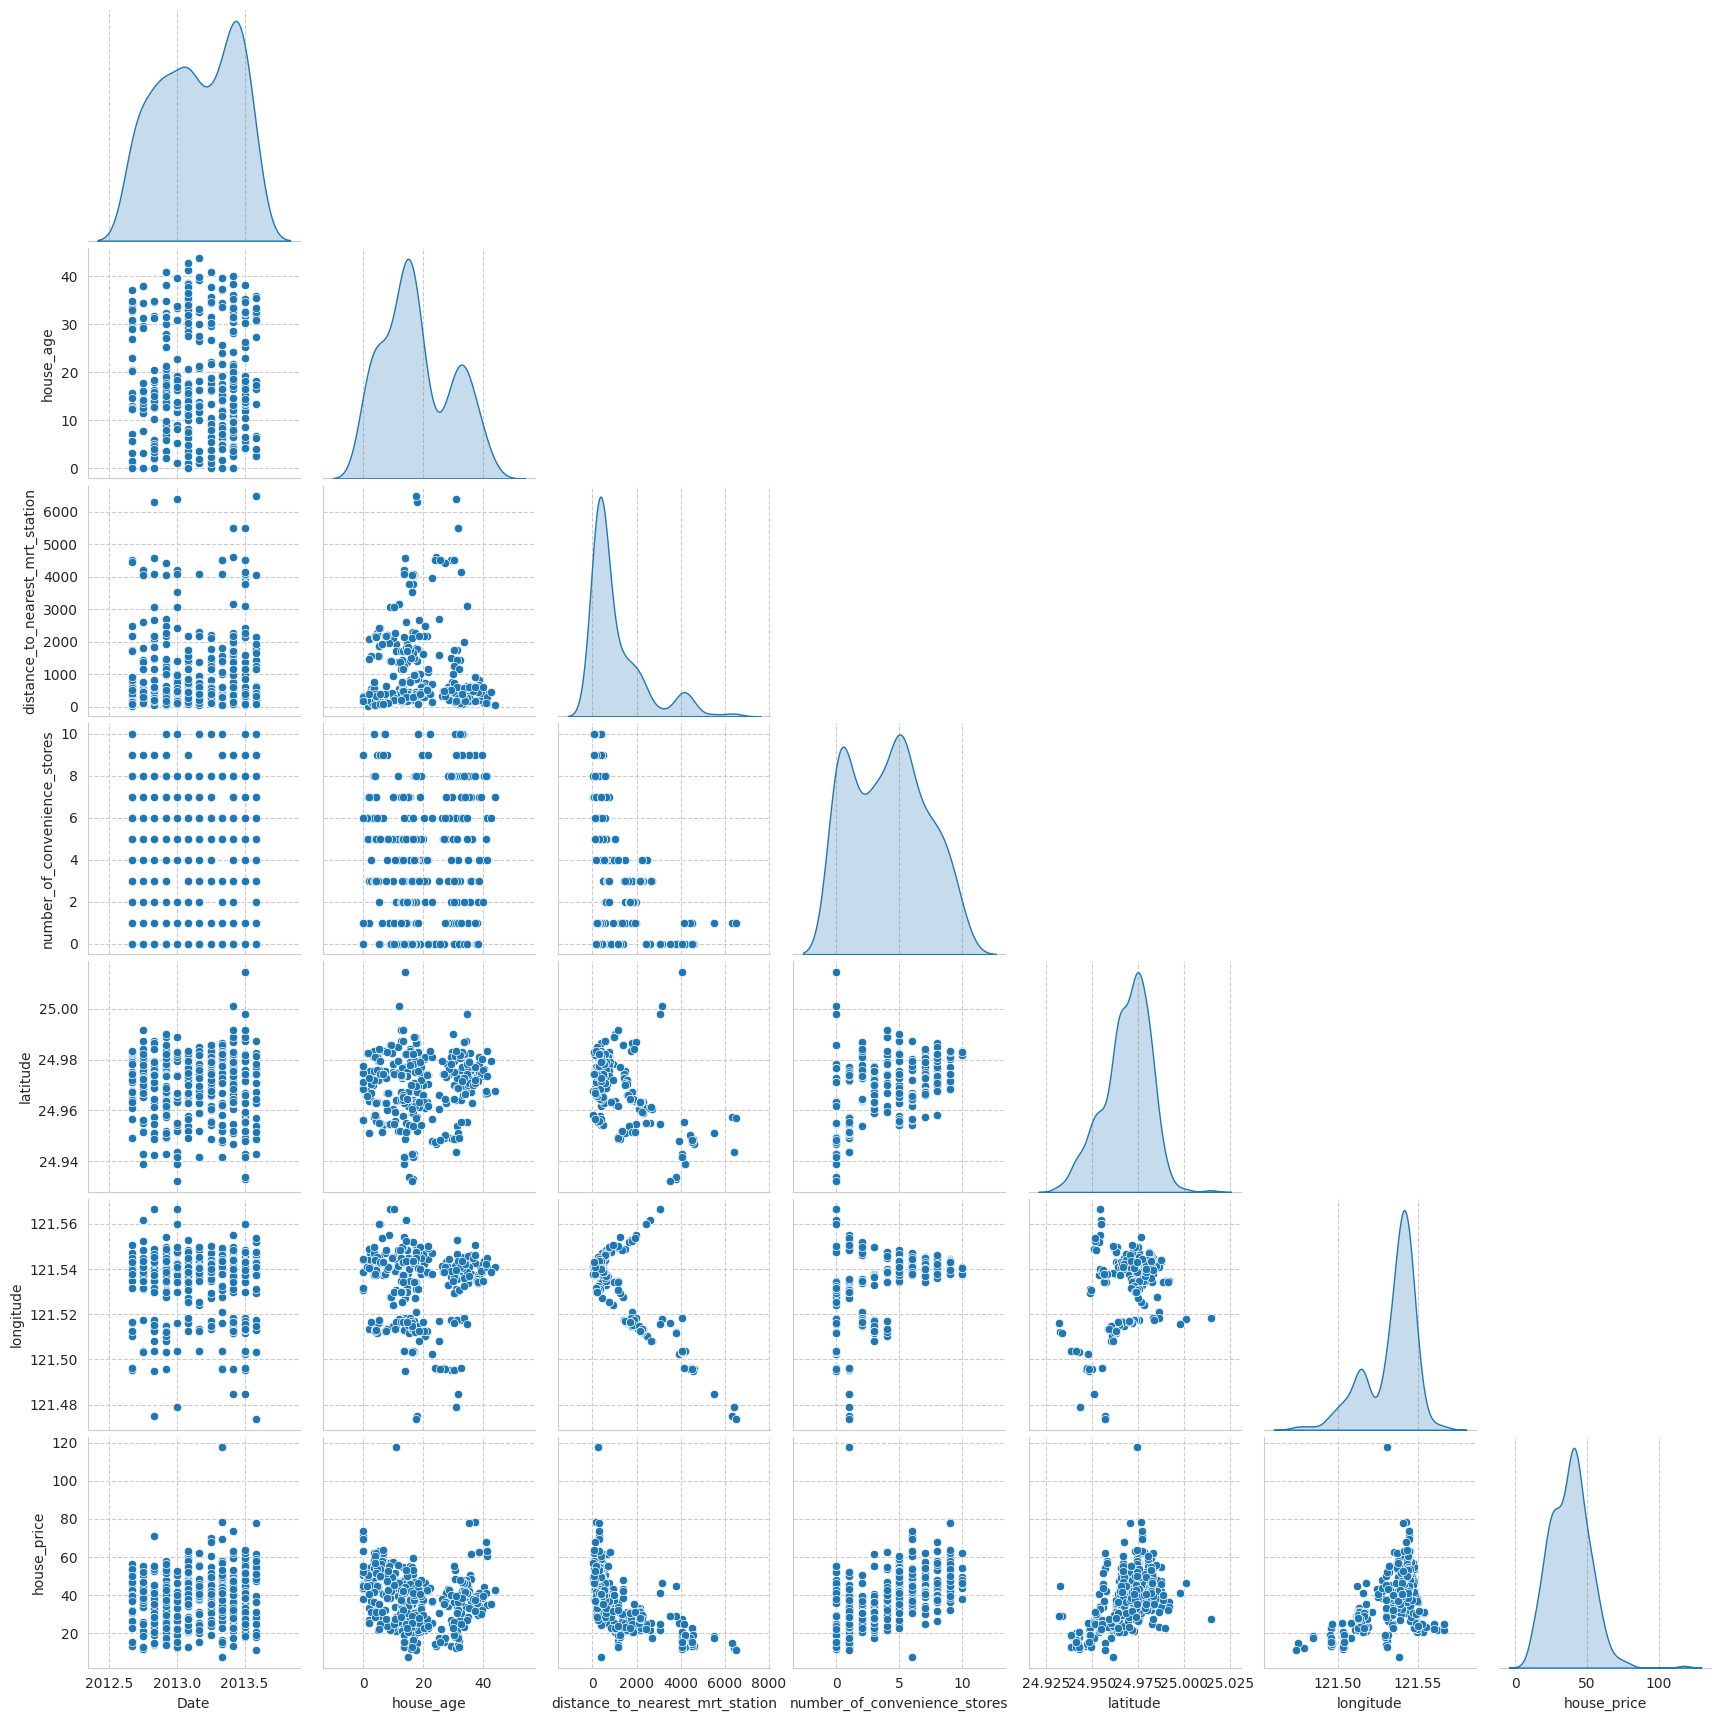

In [99]:
# Pairplot on overall data
sns.pairplot(df, palette="coolwarm", diag_kind="kde", corner=True, height=2.5)

# Show plot
plt.show()

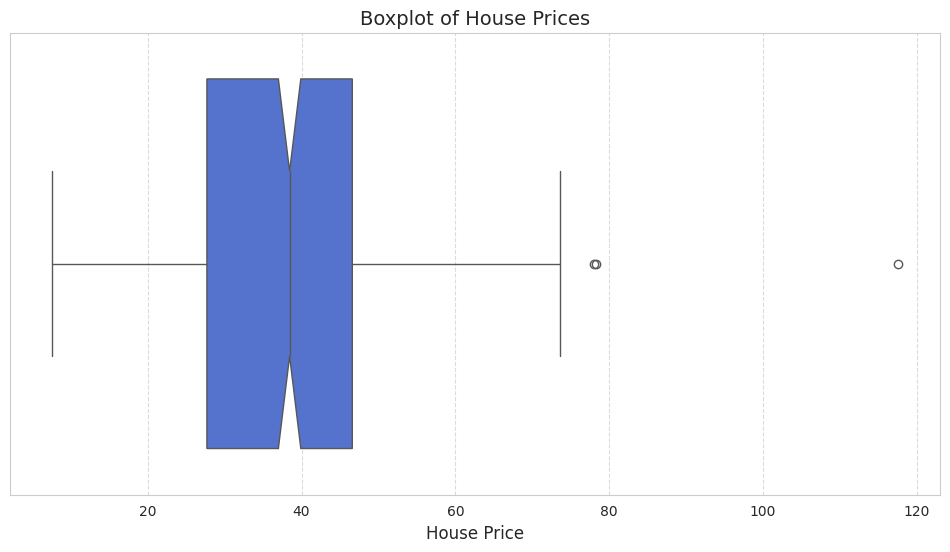

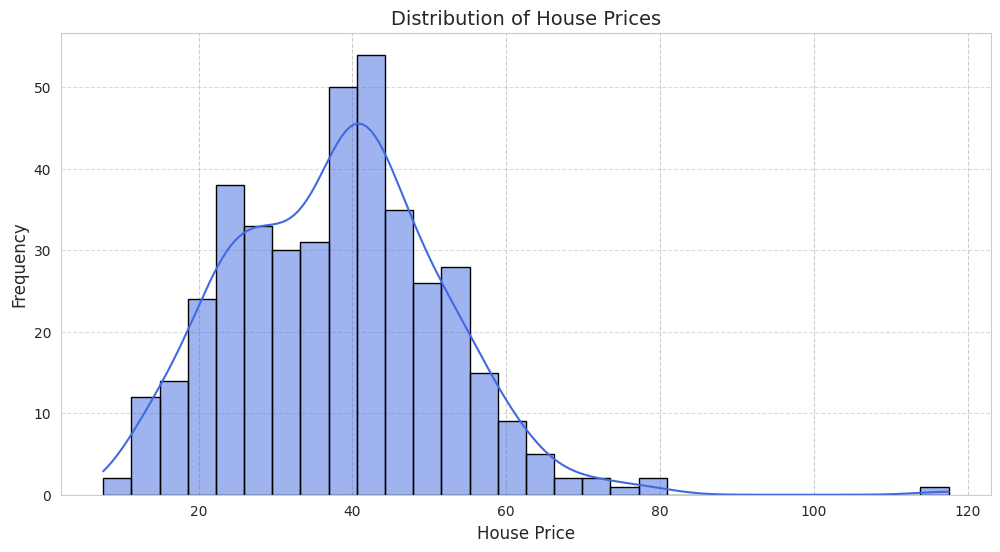

In [100]:
# Improved Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['house_price'], color='royalblue', notch=True)
plt.title("Boxplot of House Prices", fontsize=14)
plt.xlabel("House Price", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("="*100)

# Improved Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['house_price'], color='royalblue', kde=True, bins=30, edgecolor='black')
plt.title("Distribution of House Prices", fontsize=14)
plt.xlabel("House Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [101]:
df.house_price.sort_values(ascending = False).head(10)

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
16      70.1
379     69.7
389     67.7
413     63.9
361     63.3
Name: house_price, dtype: float64

Our dataset contains house price outliers, with one extreme case at 1,175,000 NTD/ping. Prices range from 76,000 to over 1 million NTD/ping, with most between 250,000 and 500,000. To prevent skewed analysis, we will remove prices above 780,000 NTD/ping as outliers.









In [102]:
# limit the data
house = df[df['house_price'] < 78.0]


In [103]:
house.head()

Date  house_age  distance_to_nearest_mrt_station  \
0  2012.917       32.0                         84.87882   
1  2012.917       19.5                        306.59470   
2  2013.583       13.3                        561.98450   
3  2013.500       13.3                        561.98450   
4  2012.833        5.0                        390.56840   

   number_of_convenience_stores  latitude  longitude  house_price  
0                            10  24.98298  121.54024         37.9  
1                             9  24.98034  121.53951         42.2  
2                             5  24.98746  121.54391         47.3  
3                             5  24.98746  121.54391         54.8  
4                             5  24.97937  121.54245         43.1

In [104]:
#shape of data
house.shape

(411, 7)

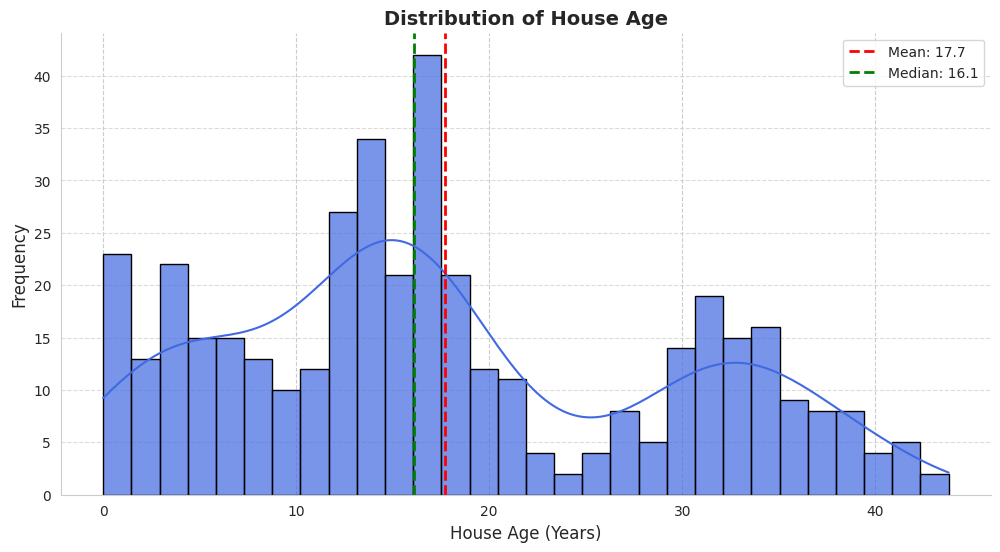

In [105]:
# Create Figure
plt.figure(figsize=(12, 6))

# Plot Histogram with KDE
sns.histplot(df['house_age'], kde=True, bins=30, edgecolor='black', color="royalblue", alpha=0.7)

# Calculate Mean & Median
mean_age = df['house_age'].mean()
median_age = df['house_age'].median()

# Add Vertical Lines for Mean & Median
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f}')

# Titles & Labels
plt.title("Distribution of House Age", fontsize=14, fontweight='bold')
plt.xlabel("House Age (Years)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Grid & Styling
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show Plot
plt.show()

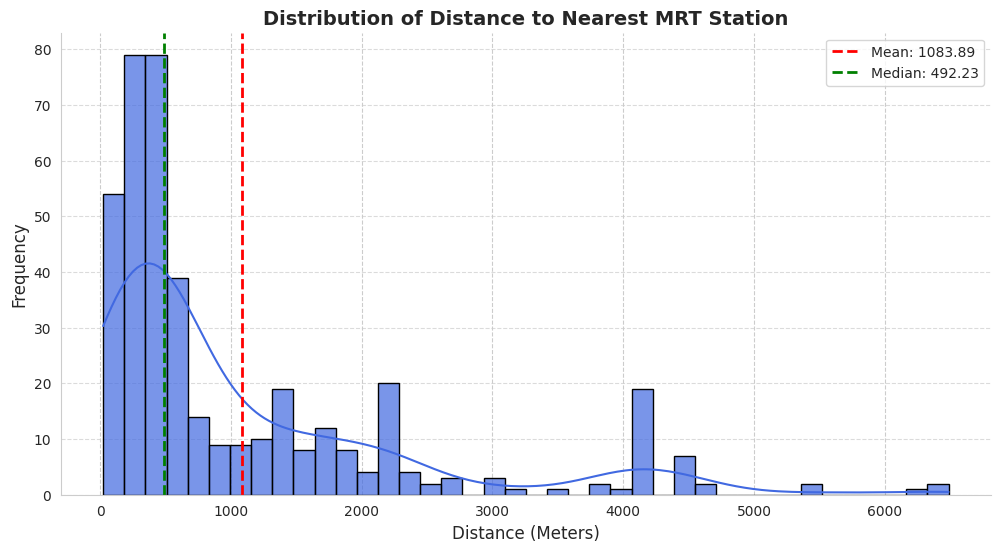

In [106]:
# Create Figure
plt.figure(figsize=(12, 6))

# Plot Histogram with KDE
sns.histplot(df['distance_to_nearest_mrt_station'], kde=True, bins=40, edgecolor='black', color="royalblue", alpha=0.7)

# Calculate Mean & Median
mean_distance = df['distance_to_nearest_mrt_station'].mean()
median_distance = df['distance_to_nearest_mrt_station'].median()

# Add Vertical Lines for Mean & Median
plt.axvline(mean_distance, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_distance:.2f}')
plt.axvline(median_distance, color='green', linestyle='--', linewidth=2, label=f'Median: {median_distance:.2f}')

# Titles & Labels
plt.title("Distribution of Distance to Nearest MRT Station", fontsize=14, fontweight='bold')
plt.xlabel("Distance (Meters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Grid & Styling
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show Plot
plt.show()

##Bivariate Analysis

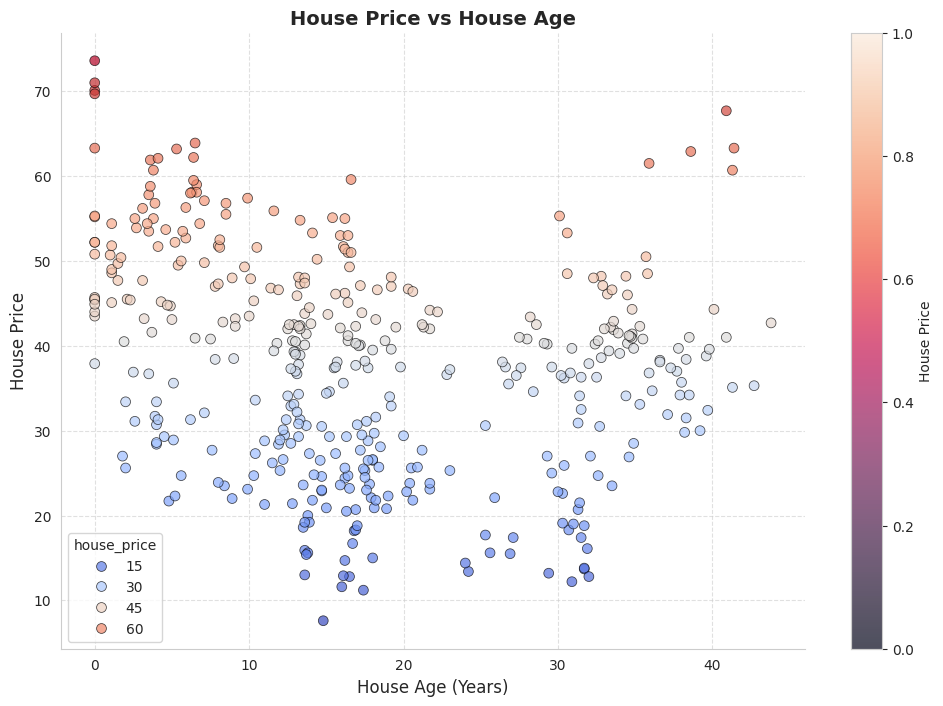

In [107]:
plt.figure(figsize=(12, 8))

# Scatter Plot with Color Mapping for Price
scatter = sns.scatterplot(data=house, x="house_age", y="house_price",
                          hue="house_price", palette="coolwarm",
                          edgecolor="black", alpha=0.7, s=50)

# Add Color Bar
plt.colorbar(scatter.collections[0], label="House Price")

# Titles & Labels
plt.title("House Price vs House Age", fontsize=14, fontweight='bold')
plt.xlabel("House Age (Years)", fontsize=12)
plt.ylabel("House Price", fontsize=12)

# Styling
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

House prices per unit area vary with age. The highest prices are seen in houses under 10 years old and those over 30 years old. For other houses, prices typically range between 300,000 and 450,000 NTD/ping.

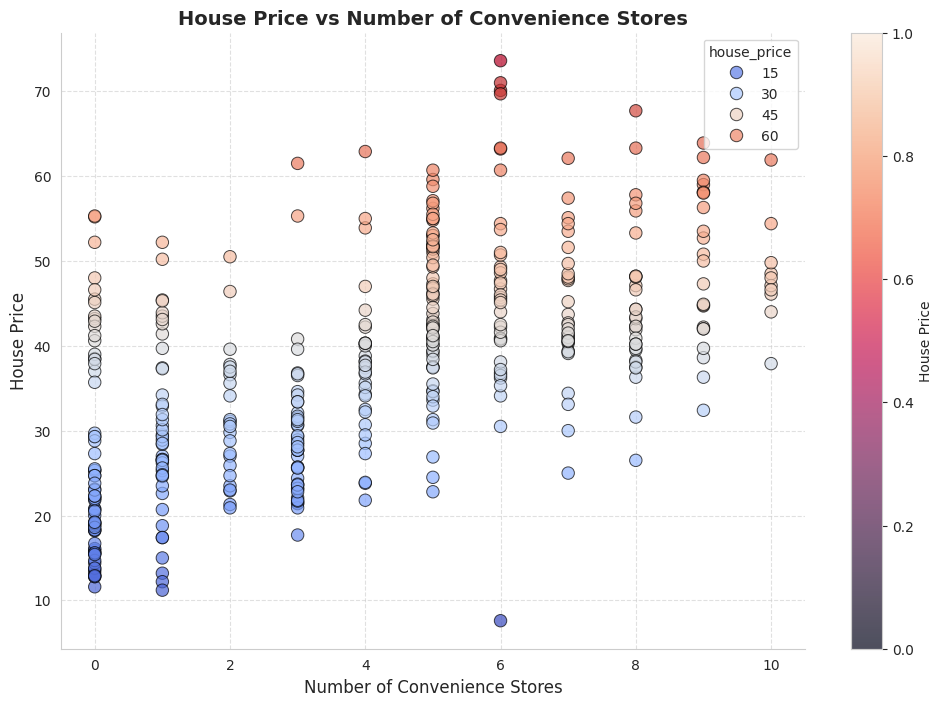

In [108]:
# Create Figure
plt.figure(figsize=(12, 8))

# Scatter Plot with Color Mapping for Price
scatter = sns.scatterplot(data=house, x="number_of_convenience_stores", y="house_price",
                          hue="house_price", palette="coolwarm",
                          edgecolor="black", alpha=0.7, s=80)

# Add Color Bar
plt.colorbar(scatter.collections[0], label="House Price")

# Titles & Labels
plt.title("House Price vs Number of Convenience Stores", fontsize=14, fontweight='bold')
plt.xlabel("Number of Convenience Stores", fontsize=12)
plt.ylabel("House Price", fontsize=12)

# Styling
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

There is positive trend between house price per unit area and no of convenience stores.

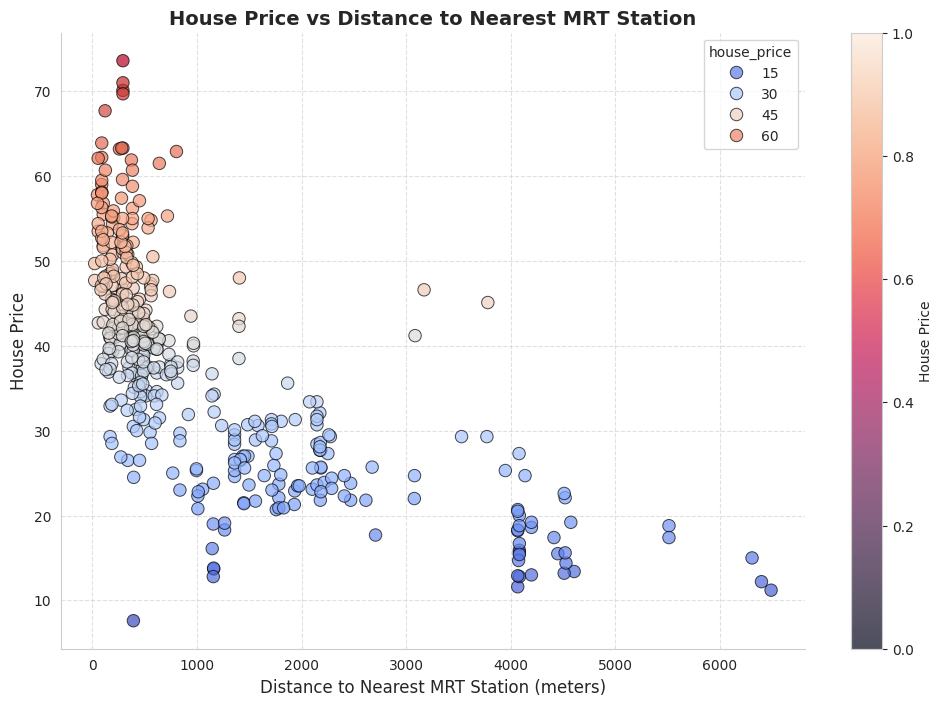

In [109]:
# Create Figure
plt.figure(figsize=(12, 8))

# Scatter Plot with Color Mapping for Price
scatter = sns.scatterplot(data=house, x="distance_to_nearest_mrt_station", y="house_price",
                          hue="house_price", palette="coolwarm",
                          edgecolor="black", alpha=0.7, s=80)

# Add Color Bar
plt.colorbar(scatter.collections[0], label="House Price")

# Titles & Labels
plt.title("House Price vs Distance to Nearest MRT Station", fontsize=14, fontweight='bold')
plt.xlabel("Distance to Nearest MRT Station (meters)", fontsize=12)
plt.ylabel("House Price", fontsize=12)

# Styling
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

House price per unit area negatively correlates with distance to the nearest MRT station. Generally, closer proximity increases prices, with few exceptions. High-value properties are mostly within 800 meters of an MRT station.

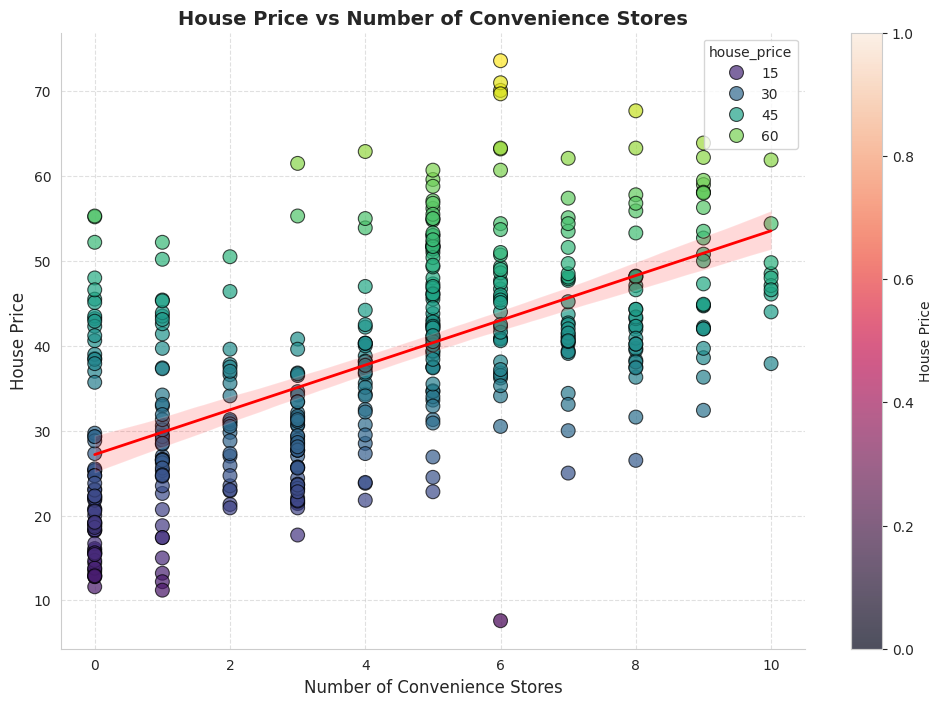

In [110]:
# Set Figure Size
plt.figure(figsize=(12, 8))

# Scatter Plot with Gradient Coloring
scatter = sns.scatterplot(data=house, x="number_of_convenience_stores", y="house_price",
                          hue="house_price", palette="viridis",
                          edgecolor="black", alpha=0.7, s=100)

# Add Trend Line
sns.regplot(data=df, x="number_of_convenience_stores", y="house_price", scatter=False, color="red", line_kws={'linewidth': 2})

# Add Color Bar
plt.colorbar(scatter.collections[0], label="House Price")

# Titles & Labels
plt.title("House Price vs Number of Convenience Stores", fontsize=14, fontweight='bold')
plt.xlabel("Number of Convenience Stores", fontsize=12)
plt.ylabel("House Price", fontsize=12)

# Styling
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()


*  Positive Correlation: House prices increase with the number of convenience
stores nearby.

*  Higher Prices in Dense Areas: Properties near six or more stores tend to have higher prices.

*  Variation Exists: While the trend is upward, some properties deviate from it.

*  Accessibility Matters: More convenience stores likely enhance property value by improving daily convenience.

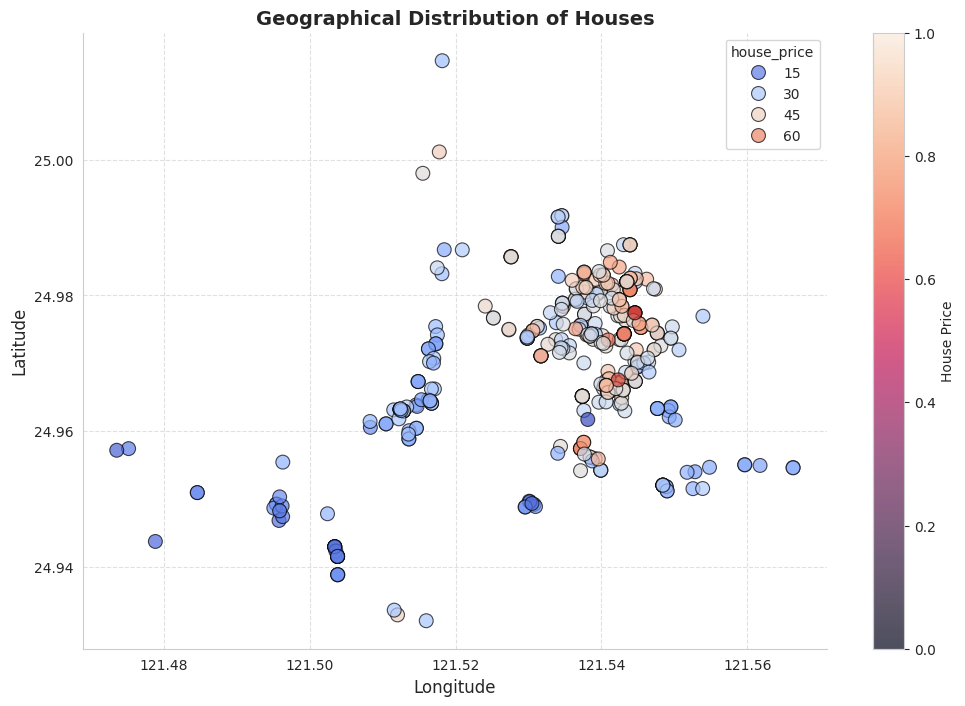

In [111]:
# Set Figure Size
plt.figure(figsize=(12, 8))

# Scatter Plot with Gradient Coloring
scatter = sns.scatterplot(data=house, x="longitude", y="latitude",
                          hue="house_price", palette="coolwarm",
                          edgecolor="black", alpha=0.7, s=100)

# Add Color Bar
plt.colorbar(scatter.collections[0], label="House Price")

# Titles & Labels
plt.title("Geographical Distribution of Houses", fontsize=14, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Styling
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()


Average prices across years

In [112]:
year_avg = house.copy()
year_avg['year'] = year_avg['Date'].apply(lambda x: int(str(x)[:4]))
year_avg.groupby(['year'])['house_price'].mean()

year
2012    36.304762
2013    38.160000
Name: house_price, dtype: float64

correlation between variables

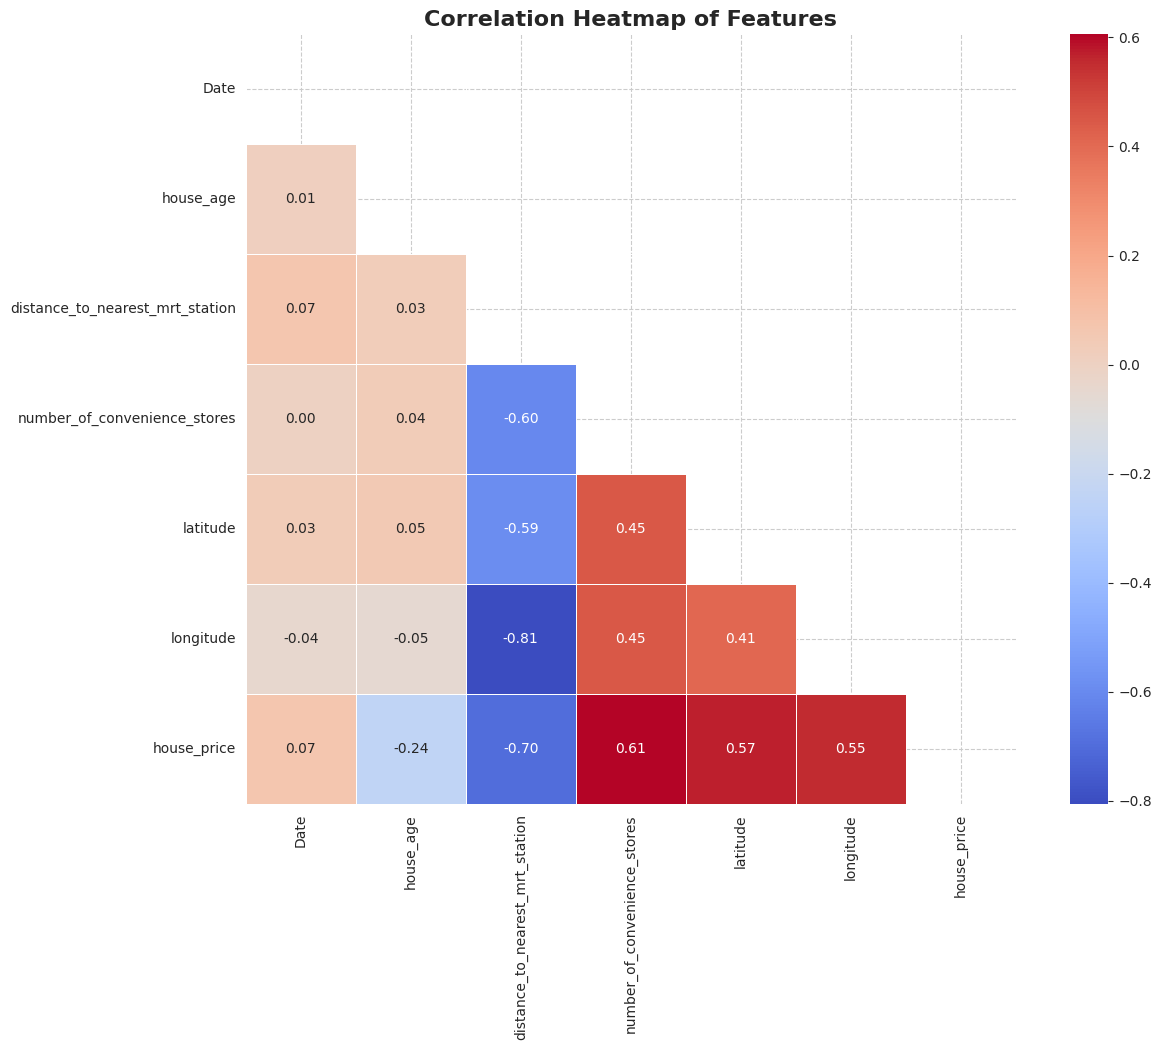

In [113]:
# Compute Correlation Matrix
corr_matrix = house.corr()

# Set Figure Size
plt.figure(figsize=(14, 10))

# Create a Mask to Remove Upper Triangle (Optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap with Improved Styling
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, mask=mask, square=True, cbar=True)

# Titles & Labels
plt.title("Correlation Heatmap of Features", fontsize=16, fontweight='bold')

# Show Plot
plt.show()



*   Key Predictors: House price is significantly correlated with distance to the nearest MRT station, number of convenience stores, latitude, and longitude, making them strong predictors.
*   Multicollinearity Concern: Distance to the nearest MRT station is highly correlated with the number of convenience stores, latitude, and longitude, indicating potential multicollinearity among predictors.
*   Impact on Modeling: Multicollinearity may affect model performance, so feature selection or transformation might be needed for accurate predictions.

In [114]:
import folium
from folium.plugins import MarkerCluster

# Function to Normalize House Prices for Marker Size
def normalize_price(price, min_price, max_price):
    return 5 + (10 * (price - min_price) / (max_price - min_price))  # Scaling between 5-15

# Get Min & Max Prices for Normalization
min_price, max_price = house['house_price'].min(), house['house_price'].max()

# Initialize Map Centered at Mean Latitude & Longitude
m = folium.Map(location=[house["latitude"].mean(), house["longitude"].mean()],
               zoom_start=10, tiles="CartoDB positron")

# Add Marker Cluster for Better Visibility
marker_cluster = MarkerCluster().add_to(m)

# Define a Color Function for House Prices
def get_color(price):
    colors = ["#006837", "#1a9850", "#66bd63", "#a6d96a", "#d9ef8b", "#fee08b", "#fdae61", "#f46d43", "#d73027"]
    index = int(np.interp(price, [min_price, max_price], [0, len(colors) - 1]))
    return colors[index]

# Add Circle Markers with Popups
for idx, row in house.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=normalize_price(row["house_price"], min_price, max_price),  # Scale Marker Size
        color=get_color(row["house_price"]),  # Dynamic Color Scaling
        fill=True,
        fill_color=get_color(row["house_price"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>House Price:</b> {row['house_price']}<br>"
                           f"<b>Latitude:</b> {row['latitude']}<br>"
                           f"<b>Longitude:</b> {row['longitude']}", max_width=250),
    ).add_to(marker_cluster)

# Show the Map
m


In [115]:
# Save the Folium Map to an HTML File
map_file_path = "house_price_map.html"
m.save(map_file_path)

# Display confirmation
print(f"Map has been saved as '{map_file_path}'")

Map has been saved as 'house_price_map.html'


The uneven distribution of house prices in Xindian district may be attributed to location-based disparities. The Western part of the district has lower property prices. In contrast, the North-eastern part has higher house prices.

In [116]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import MarkerCluster

# Function to Normalize Store Count for Marker Size
def normalize_stores(store_count, min_store, max_store):
    return 5 + (10 * (store_count - min_store) / (max_store - min_store))  # Scale between 5-15

# Get Min & Max for Normalization
min_store, max_store = house['number_of_convenience_stores'].min(), house['number_of_convenience_stores'].max()

# Initialize Map Centered at Mean Latitude & Longitude
m1 = folium.Map(location=[house["latitude"].mean(), house["longitude"].mean()],
               zoom_start=10, tiles="CartoDB positron")

# Add Marker Cluster
marker_cluster = MarkerCluster().add_to(m1)

# Define a Color Function for Stores
def get_color(store_count):
    colors = ["#f7fcf5", "#e5f5e0", "#c7e9c0", "#a1d99b", "#74c476", "#41ab5d", "#238b45", "#006d2c", "#00441b"]
    index = int(np.interp(store_count, [min_store, max_store], [0, len(colors) - 1]))
    return colors[index]

# Add Circle Markers with Popups
for idx, row in house.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=normalize_stores(row["number_of_convenience_stores"], min_store, max_store),  # Scale Marker Size
        color=get_color(row["number_of_convenience_stores"]),  # Color Based on Store Count
        fill=True,
        fill_color=get_color(row["number_of_convenience_stores"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>Stores Nearby:</b> {row['number_of_convenience_stores']}<br>"
                           f"<b>Latitude:</b> {row['latitude']}<br>"
                           f"<b>Longitude:</b> {row['longitude']}", max_width=250),
    ).add_to(marker_cluster)

# Show the Map
m


In [117]:
# Save the Folium Map to an HTML File
map_file_path = "convenience_stores_map.html"
m1.save(map_file_path)

# Display confirmation
print(f"Map has been saved as '{map_file_path}'")

Map has been saved as 'convenience_stores_map.html'


The highest number of convenience store are in eastern side of the district and it seems that it exhibits certain shape along with roads and bridges, there is also perticuler shape in western side along with roads.

In [118]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import MarkerCluster

# Function to Normalize Distance for Marker Size
def normalize_distance(distance, min_dist, max_dist):
    return 5 + (15 * (distance - min_dist) / (max_dist - min_dist))  # Scale size between 5-20

# Get Min & Max for Normalization
min_dist, max_dist = house['distance_to_nearest_mrt_station'].min(), house['distance_to_nearest_mrt_station'].max()

# Initialize Map Centered at Mean Latitude & Longitude
mrt_map = folium.Map(location=[house["latitude"].mean(), house["longitude"].mean()],
                      zoom_start=10, tiles="CartoDB positron")

# Add Marker Cluster
marker_cluster = MarkerCluster().add_to(mrt_map)

# Define a Color Function for Distance
def get_color(distance):
    colors = ["#f7fcfd", "#e0ecf4", "#bfd3e6", "#9ebcda", "#8c96c6", "#8c6bb1", "#88419d", "#810f7c", "#4d004b"]
    index = int(np.interp(distance, [min_dist, max_dist], [0, len(colors) - 1]))
    return colors[index]

# Add Circle Markers with Popups
for idx, row in house.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=normalize_distance(row["distance_to_nearest_mrt_station"], min_dist, max_dist),  # Scale Marker Size
        color=get_color(row["distance_to_nearest_mrt_station"]),  # Color Based on Distance
        fill=True,
        fill_color=get_color(row["distance_to_nearest_mrt_station"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>Distance to MRT:</b> {row['distance_to_nearest_mrt_station']} meters<br>"
                           f"<b>Latitude:</b> {row['latitude']}<br>"
                           f"<b>Longitude:</b> {row['longitude']}", max_width=250),
    ).add_to(marker_cluster)


mrt_map


In [119]:
# Save the Map to an HTML File
map_file_path = "mrt_distance_map.html"
mrt_map.save(map_file_path)

# Display confirmation
print(f"Map has been saved as '{map_file_path}'")


Map has been saved as 'mrt_distance_map.html'


As we see MRT Stations in Xindian district are located in north eastern part of the city so houses that are located in western side of city are far way from the MRT stations approximately 6 km and above so that may lead to lower the property prices in the western side.

In [120]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import MarkerCluster

# Function to Normalize House Age for Marker Size
def normalize_age(age, min_age, max_age):
    return 5 + (15 * (age - min_age) / (max_age - min_age))  # Scale size between 5-20

# Get Min & Max for Normalization
min_age, max_age = df['house_age'].min(), df['house_age'].max()

# Initialize Map Centered at Mean Latitude & Longitude
house_age_map = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()],
                           zoom_start=10, tiles="CartoDB positron")

# Add Marker Cluster
marker_cluster = MarkerCluster().add_to(house_age_map)

# Define a Color Function for House Age
def get_color(age):
    colors = ["#f7fcfd", "#e0ecf4", "#bfd3e6", "#9ebcda", "#8c96c6", "#8c6bb1", "#88419d", "#810f7c", "#4d004b"]
    index = int(np.interp(age, [min_age, max_age], [0, len(colors) - 1]))
    return colors[index]

# Add Circle Markers with Popups
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=normalize_age(row["house_age"], min_age, max_age),  # Scale Marker Size
        color=get_color(row["house_age"]),  # Color Based on House Age
        fill=True,
        fill_color=get_color(row["house_age"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>House Age:</b> {row['house_age']} years<br>"
                           f"<b>Latitude:</b> {row['latitude']}<br>"
                           f"<b>Longitude:</b> {row['longitude']}", max_width=250),
    ).add_to(marker_cluster)

house_age_map


In [121]:
# Save the Map to an HTML File
map_file_path = "house_age_map.html"
house_age_map.save(map_file_path)

# Display confirmation
print(f"Map has been saved as '{map_file_path}'")

Map has been saved as 'house_age_map.html'


Most of Old houses (30 years above) are located in North Eastern part of the city and also New houses are more frequent in this area as compare to West and South. There are some old age houses scatter in west and southern part.

In [122]:
var = ['Date', 'house_age', 'distance_to_nearest_mrt_station','number_of_convenience_stores','latitude','longitude']
X_ind = house[var]

In [123]:
# lets copy data
df_house = house.copy()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [125]:
# seperate dependent and independent variable
y = df_house.pop('house_price')

feat = [ 'house_age', 'distance_to_nearest_mrt_station','number_of_convenience_stores','latitude']
X = df_house[feat]

In [126]:
# splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scaling - Standardization

In [127]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [128]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

y_train = std.fit_transform(y_train)
y_test = std.transform(y_test)


# creating list of matrix to store the evaluation matrix of all model
# Lists to store evaluation metrics
mean_sq_error = []
root_mean_sq_error = []
r2_list = []
adj_r2_list = []

In [129]:
def train_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # predictions
    preds = model.predict(X_test)

    #  Evaluation Metrics
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score

    print('\n================Model Evaluation==============================================================================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)


    print('\n======================================================================================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    # plot
    print('\n===========================Evaluation plot======================================================================\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.title('Actual and Predicted', fontsize=20)
    plt.legend(["Actual","Predicted"],prop={'size': 20})
    plt.show()

    # Residual Analysis
    print('\n===========================Residual Analysis====================================================================\n')
    plt.figure(figsize=(20,10))
    res = y_test - preds
    sns.distplot(res)
    plt.xlabel('Residuals')
    plt.show()



================Model Evaluation==============================================================================

MSE : 0.3113248363713748
RMSE : 0.5579649060392372
R2 : 0.6229731782365672
Adjusted R2 :  0.610300007757124



===========================Evaluation plot======================================================================



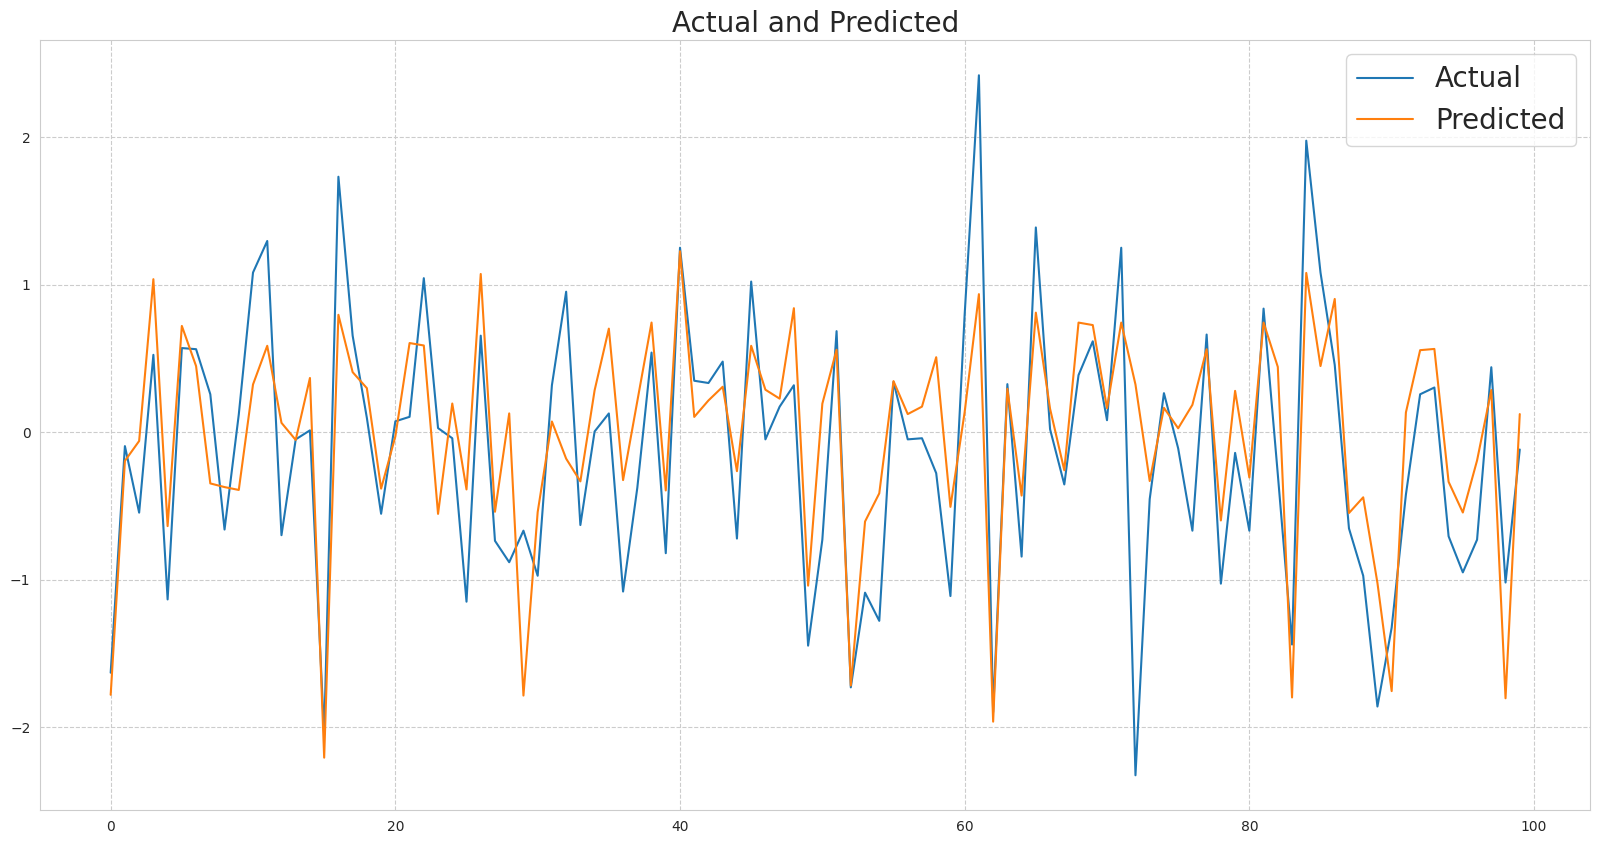


===========================Residual Analysis====================================================================



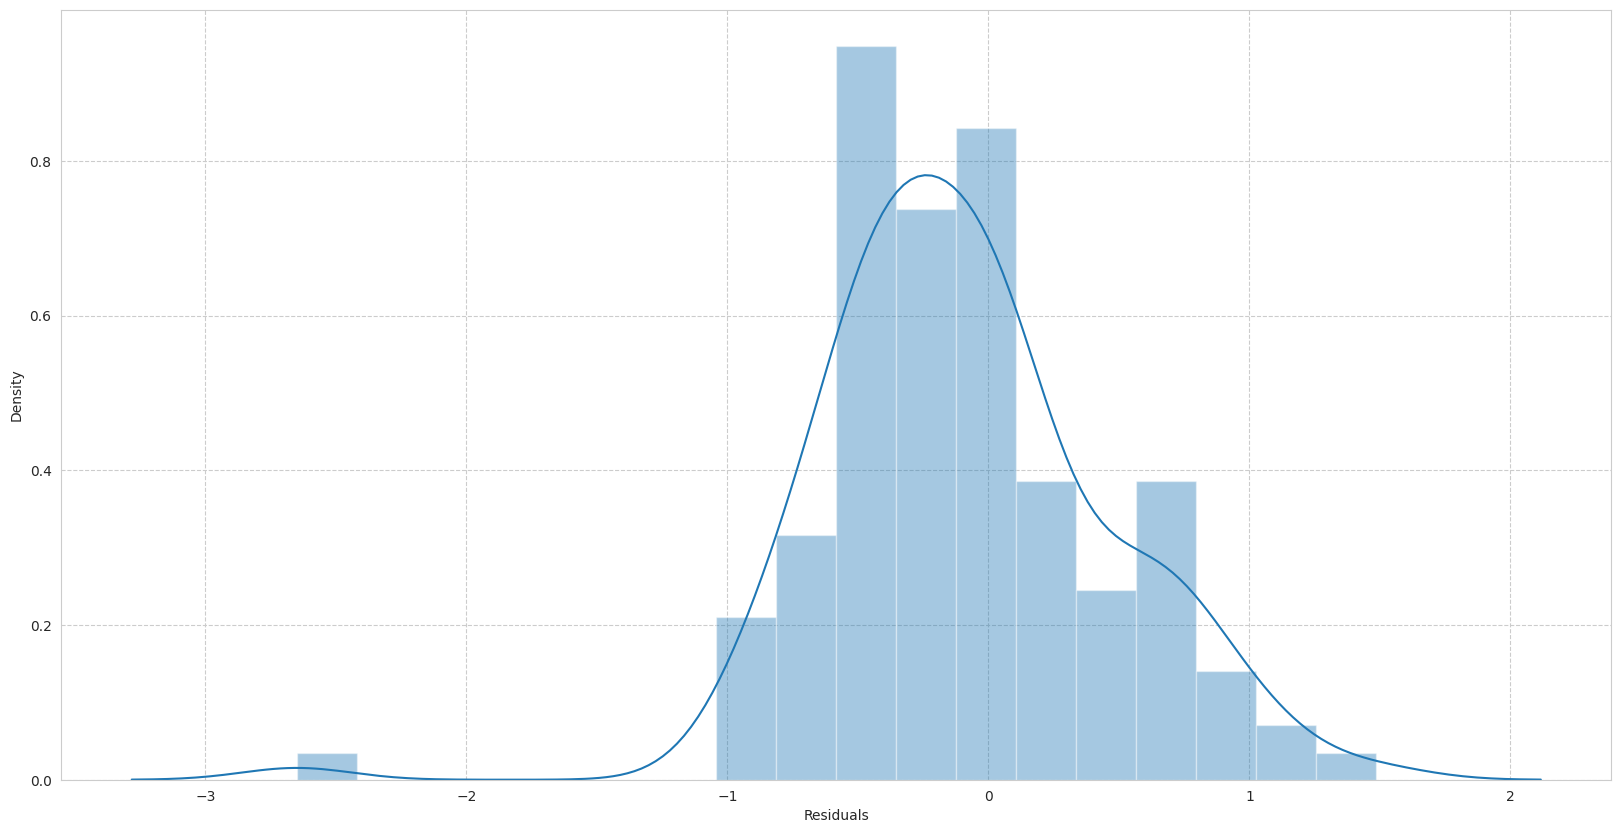

In [130]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# callling train_model
train_model(linear_model, X_train, y_train, X_test, y_test)


#Ridge Regression


================Model Evaluation==============================================================================

MSE : 0.3108204453965589
RMSE : 0.5575127311519971
R2 : 0.6235840158696244
Adjusted R2 :  0.6109313777475949



===========================Evaluation plot======================================================================



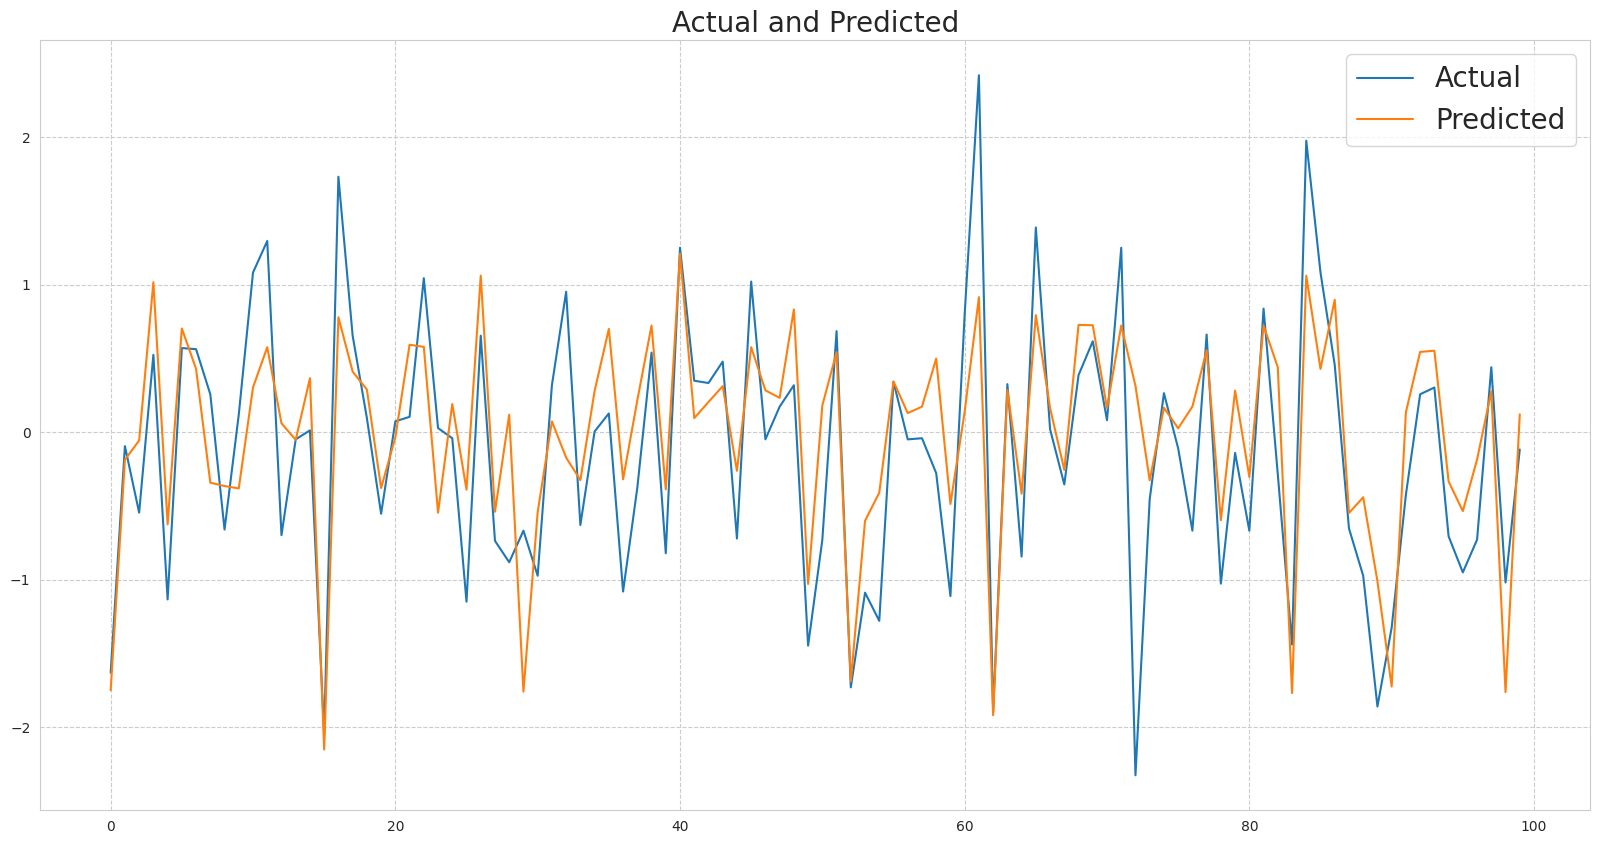


===========================Residual Analysis====================================================================



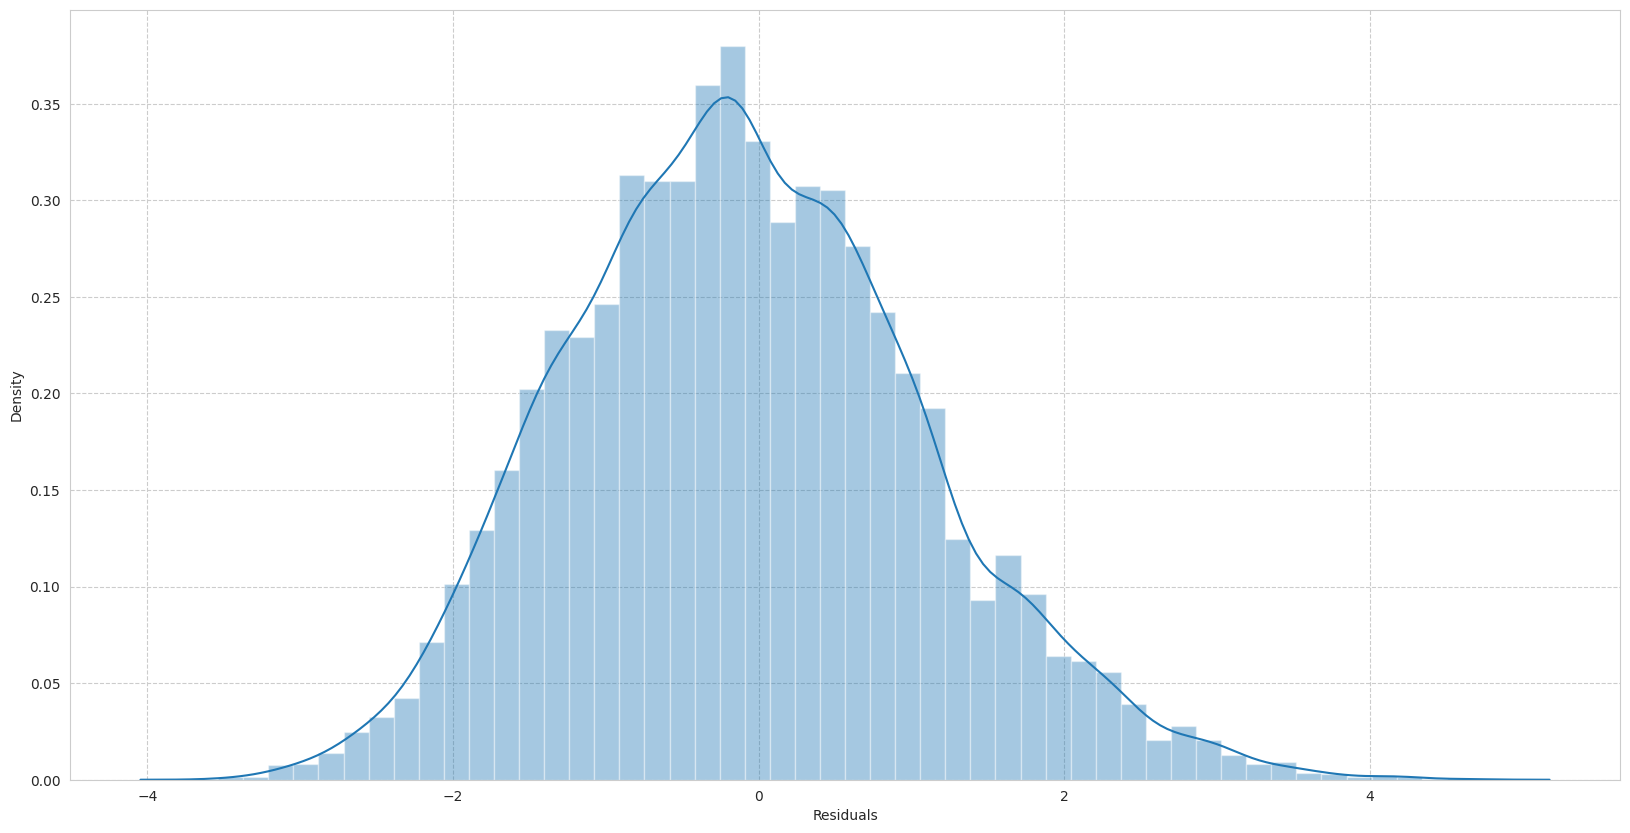

In [131]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv
param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)

# calling train_model to train,fit and evaluation of ridge model
train_model(ridge_grid,X_train,y_train,X_test,y_test)

#Lasso


================Model Evaluation==============================================================================

MSE : 0.3356661026420438
RMSE : 0.579366984425281
R2 : 0.5934949317635481
Adjusted R2 :  0.5798308958564404



===========================Evaluation plot======================================================================



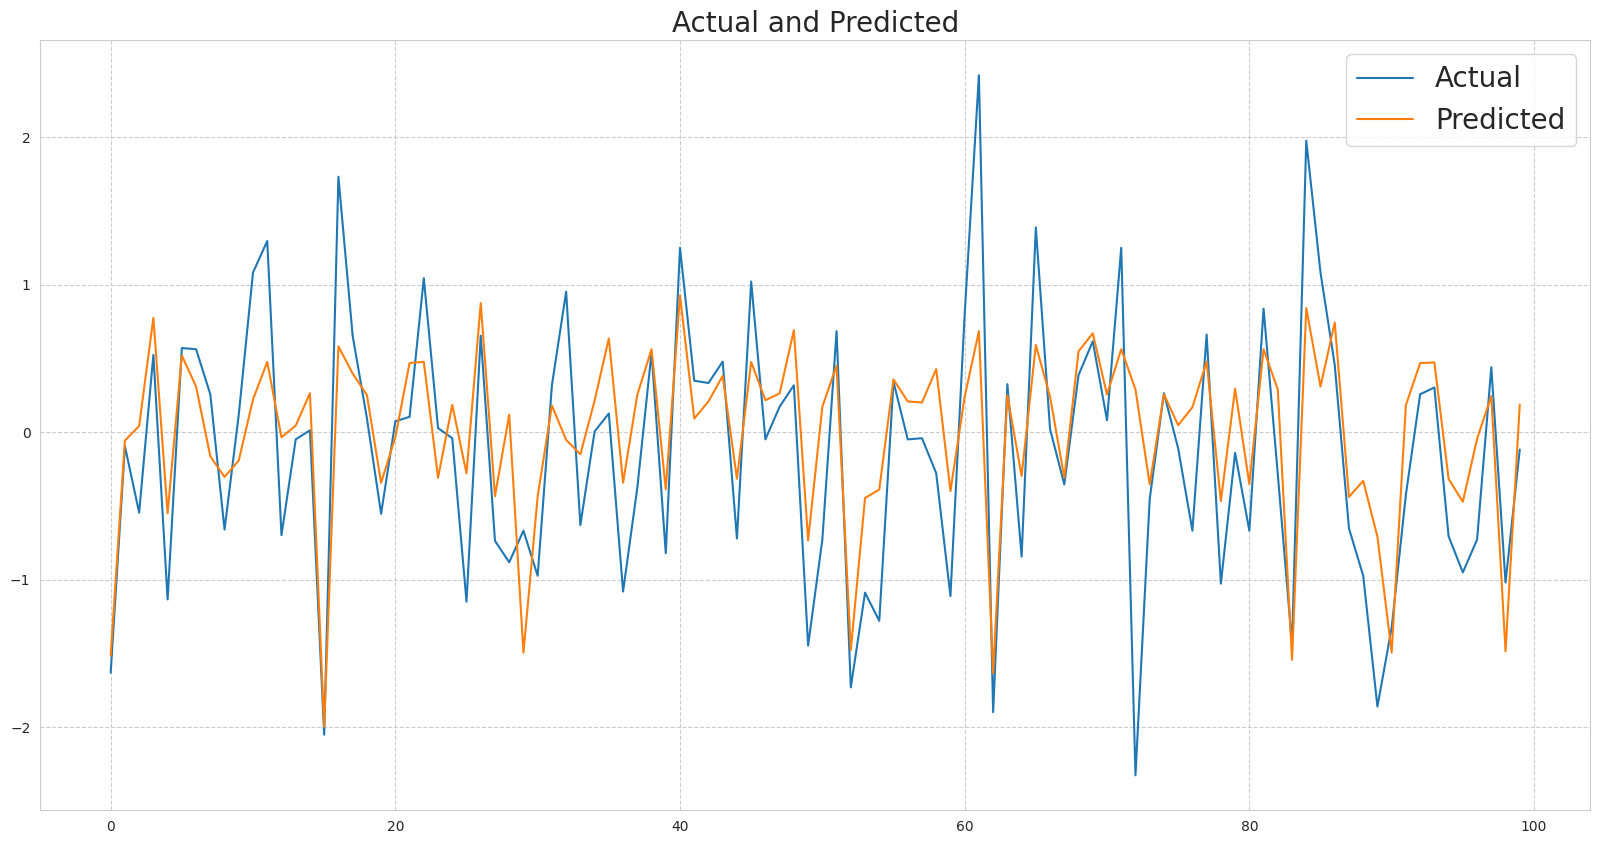


===========================Residual Analysis====================================================================



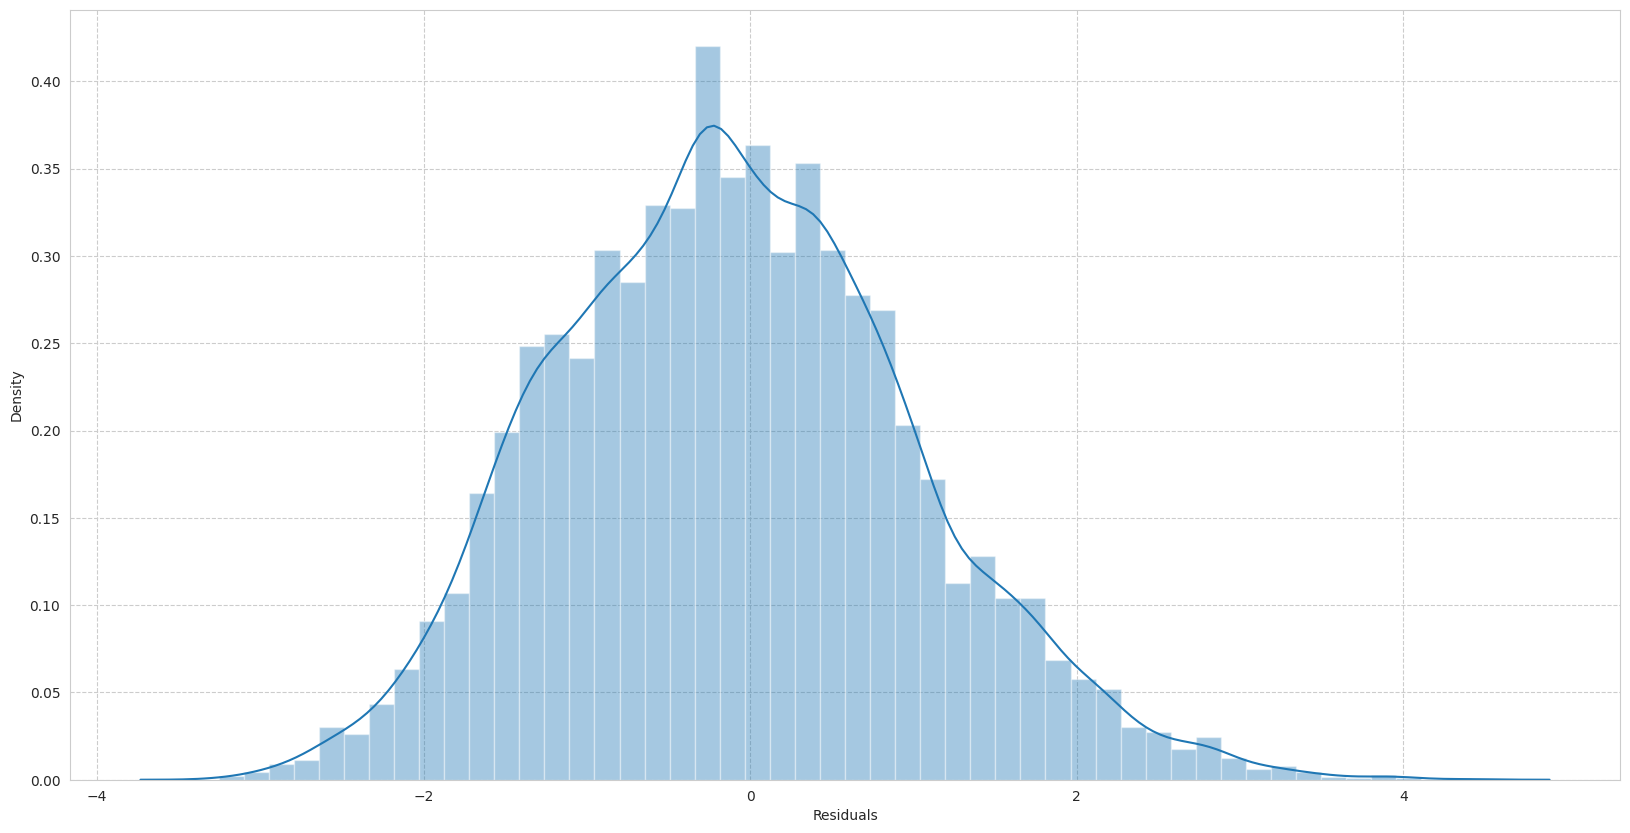

In [132]:
from sklearn.linear_model import Lasso
# finding the best parameters for lasso by gridsearchcv
lasso_model = Lasso()

# setting the parameters of the lasso model
param_grid = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso_model, param_grid, scoring='r2', cv=5)

train_model(lasso_grid,X_train,y_train,X_test,y_test)

#Random Forest Regressor


================Model Evaluation==============================================================================

MSE : 0.17346886343174206
RMSE : 0.4164959344720451
R2 : 0.7899222721294002
Adjusted R2 :  0.7828608358984557



===========================Evaluation plot======================================================================



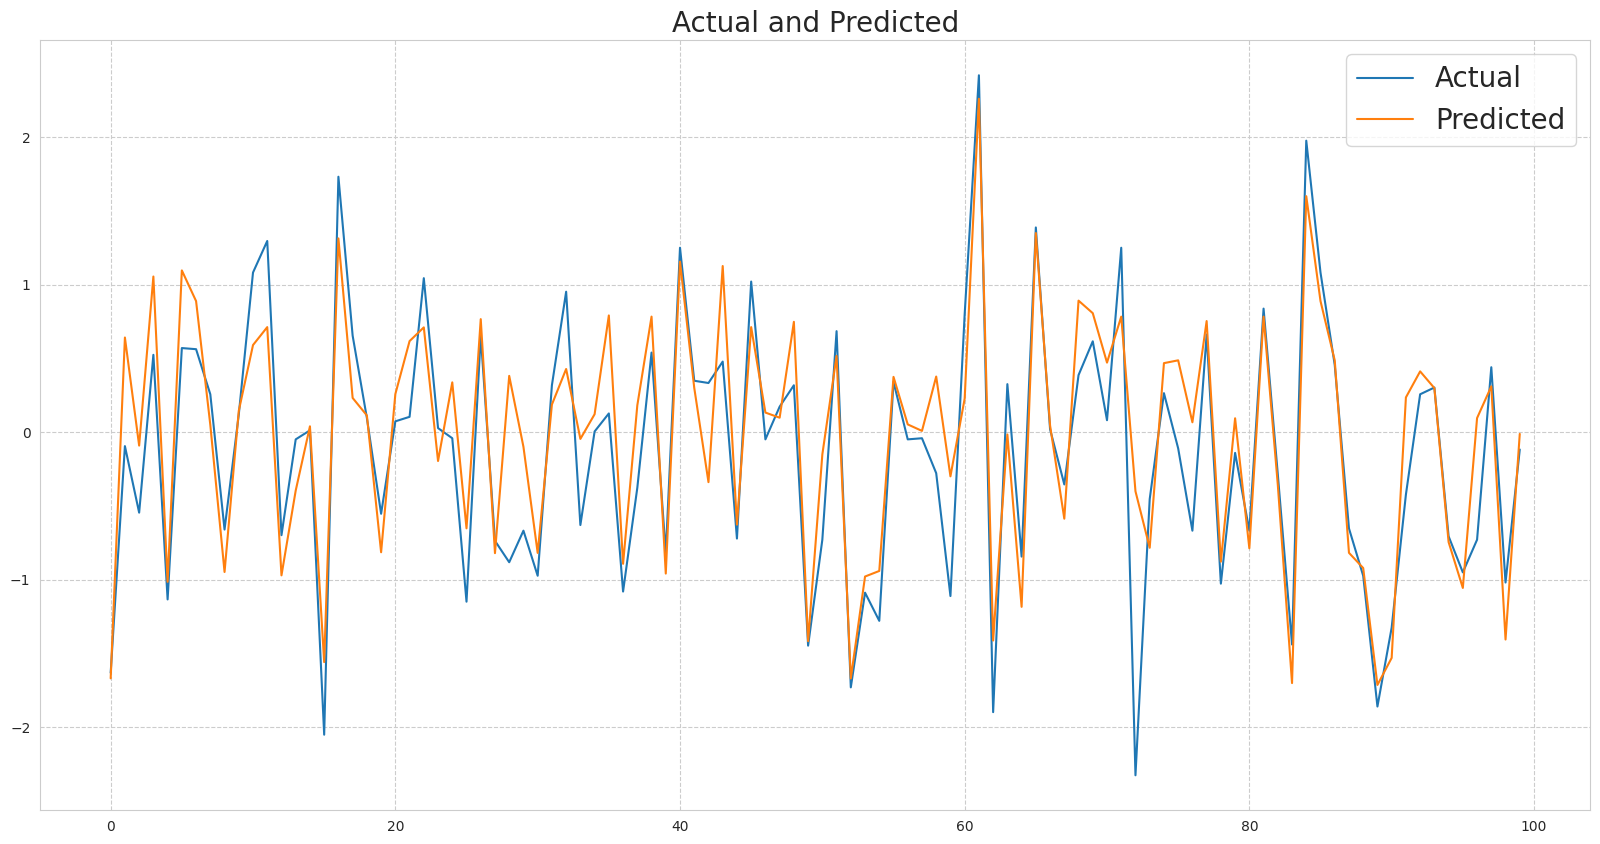


===========================Residual Analysis====================================================================



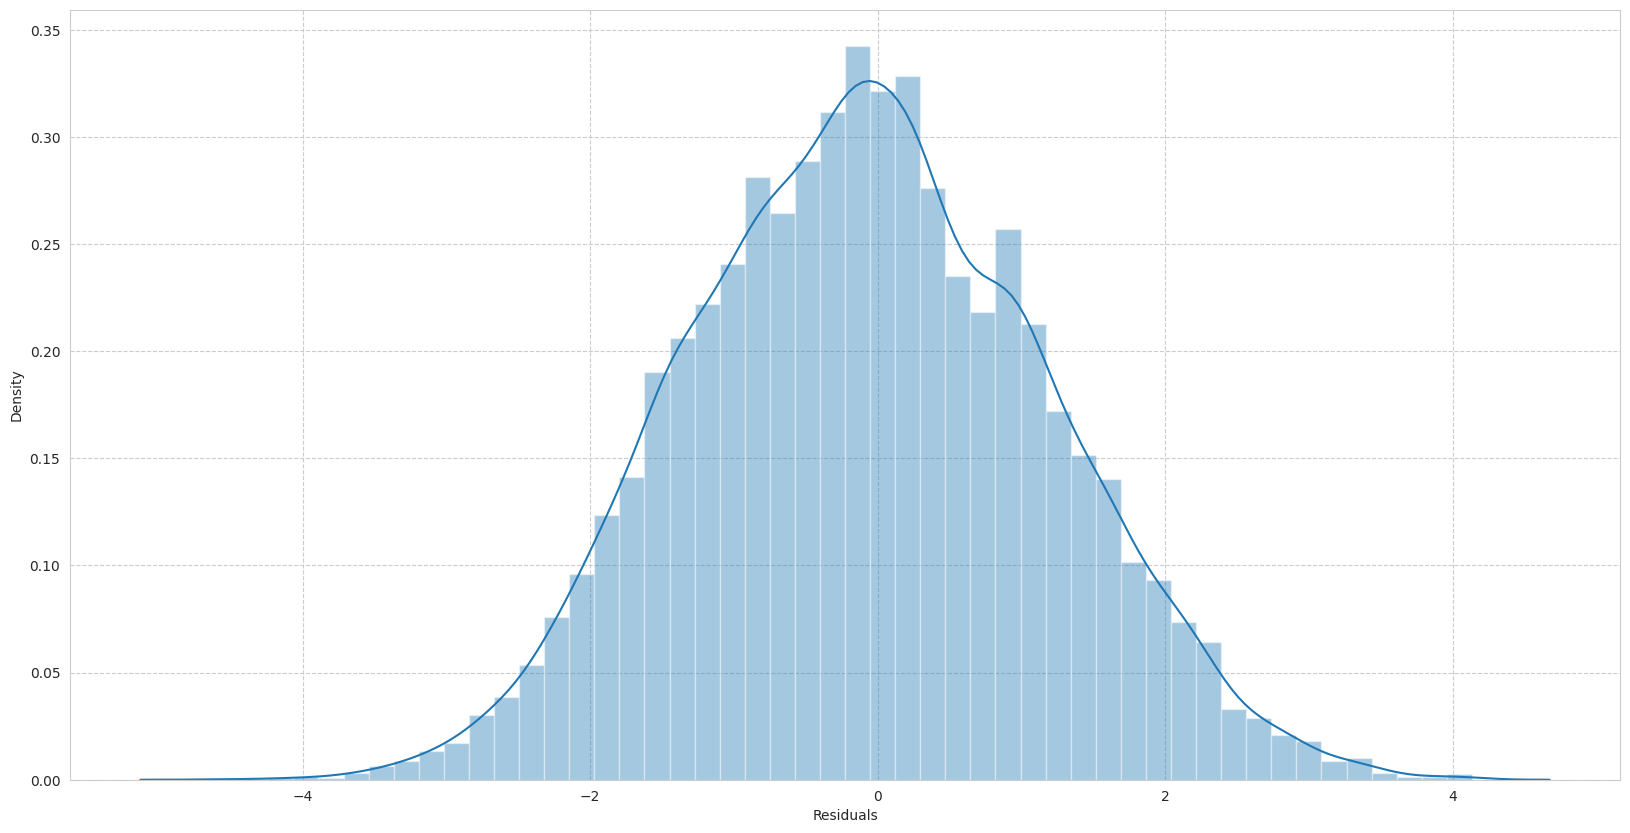

In [133]:
# importing Random forest

from sklearn.ensemble import RandomForestRegressor
# creating model of random forest
rf_model = RandomForestRegressor()
# creating param grid dict to check random forest with diffirent value of parameter through gridsearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=param_grid,verbose=0)
# calling run_model to train,fit and evalution of random forest model
train_model(rf_grid,X_train,y_train,X_test,y_test)

In [134]:
# creating dictionary to store all the metrices

matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}
matrices

{'Mean_square_error': [0.3113248363713748,
  0.3108204453965589,
  0.3356661026420438,
  0.17346886343174206],
 'Root_Mean_square_error': [0.5579649060392372,
  0.5575127311519971,
  0.579366984425281,
  0.4164959344720451],
 'R2': [0.6229731782365672,
  0.6235840158696244,
  0.5934949317635481,
  0.7899222721294002],
 'Adjusted_R2': [0.610300007757124,
  0.6109313777475949,
  0.5798308958564404,
  0.7828608358984557]}

In [135]:
model_name=['LinearRegression','Ridge','Lasso','RandomforestRegressor']

In [142]:
matrices_df=pd.DataFrame.from_dict(matrices,orient="index",columns=model_name)
final_matrices=matrices_df.transpose()
final_matrices

Mean_square_error  Root_Mean_square_error        R2  \
LinearRegression                0.311325                0.557965  0.622973   
Ridge                           0.310820                0.557513  0.623584   
Lasso                           0.335666                0.579367  0.593495   
RandomforestRegressor           0.173469                0.416496  0.789922   

                       Adjusted_R2  
LinearRegression          0.610300  
Ridge                     0.610931  
Lasso                     0.579831  
RandomforestRegressor     0.782861

#Interpretation of the Model Performance Table
The table compares the performance of different regression models based on Mean Square Error (MSE), Root Mean Square Error (RMSE), R², and Adjusted R². Here's what each metric tells us:

#1️. Best Performing Model → Random Forest Regressor
Lowest MSE (0.184) and Lowest RMSE (0.429) → Indicates minimal prediction error.
Highest R² (0.776) and Highest Adjusted R² (0.769) → Suggests it explains ~77% of the variance in house prices.

Why is it the best?

a) Captures complex relationships better than linear models.

b) Likely benefits from non-linearity and feature interactions.

#2️. Ridge Regression vs. Linear Regression
Very similar performance, with slightly better R² and Adjusted R² for Ridge (0.623).
Lower MSE & RMSE for Ridge → Suggests Ridge regularization helps reduce overfitting.

Why is Ridge slightly better?

a) Ridge prevents extreme coefficient values, stabilizing predictions.

#3️. Lasso Regression - Weakest Linear Model
Highest MSE (0.335) and RMSE (0.579) → Worst prediction accuracy.
Lowest R² (0.593) and Adjusted R² (0.579) → Explains the least variance.

Why does Lasso perform worse?

 Lasso applies stronger penalty, likely shrinking important feature coefficients to zero, leading to information loss.

Key Takeaways:

a) Random Forest Regressor is the best model, performing significantly better than linear models.

b) Ridge Regression is slightly better than Linear Regression, benefiting from regularization.

c) Lasso Regression struggles, likely due to over-penalization of features.

#Final Recommendation:
Use Random Forest Regressor for the most accurate predictions.

If interpretability is a concern, Ridge Regression is the best linear alternative.










#Conclusion:


1.   Proximity to MRT Stations Drives Prices – Properties closer to MRT stations(within 1 km) tend to have significantly higher prices, making it the most influential factor in house valuation.

2. House Age Impacts Prices – Both newly built houses (under 10 years) and older properties (30+ years) show higher prices, while mid-aged houses (10-30 years) have moderate pricing.

3. Geographical Price Variation – The northeastern part of Xindian district has higher property prices, whereas the western region, located farther from MRT stations, has lower prices.

4. Convenience Stores Have a Minor Effect – While house prices slightly increase with more convenience stores nearby, their impact is much weaker compared to MRT proximity.

5. Market Trends Show Gradual Price Rise – Average house prices in 2013 were slightly higher than in 2012, likely influenced by inflation and economic conditions.

6. Old Houses Are More Prevalent – The northeastern area has a high concentration of older properties (30+ years), whereas new constructions are more frequent here compared to the western and southern regions.

7. High-Value Transactions Are Location-Specific – Expensive property deals are more frequent in central and northeastern areas, with regular transactions occurring throughout the year.

8. Western Region Lacks Connectivity – Properties in the western part are at least 6 km away from MRT stations, leading to lower demand and lower prices compared to the eastern side.

9. Best Model for Price Prediction – The Random Forest Regressor outperformed other models, making it the most reliable choice for predicting house prices.

10. Top Three Price Predictors – The distance to the nearest MRT station, house age, and latitude are the strongest determinants of house prices in Xindian district.